<p style="color:white; background:#07D; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">Christophe Schlick</span>
<span style="width:49%; display:inline-block; text-align:right">schlick[at]u-bordeaux.fr</span>
<span style="font-size:40px; font-style:normal"><b>GENERATION DE TRACÉS</b></span><br>
<span style="width:49%; display:inline-block; text-align:left">Version 2023-01</span>
<span style="width:49%; display:inline-block; text-align:right">Licence CC-BY-NC-ND</span></p>

L'objectif de cette feuille d'exercices est d'illustrer le principe de ***génération de tracés par algorithmes***. Dans le vocabulaire lié à l'imagerie numérique, un **tracé** est une image créée par un ensemble de commandes graphiques permettant de décrire une image par le biais d'un langage de description.
On ne va donc pas définir l'image pixel par pixel (comme on l'a fait dans la feuille d'exercices A) mais fournir des informations de plus haut niveau permettant à un interpréteur de construire l'image en fonction de la liste des commandes. Pour ce type de construction, on utilise également le terme d'***image vectorielle*** par opposition à ***image matricielle*** (= la grille de pixels), mais le terme **tracé** (**draw** en anglais) s'impose de plus en plus, depuis quelques années.

L'ensemble des exercices vont mettre en oeuvre l'utilisation du langage Python pour générer ces tracés via l'écriture de code au format **SVG** (***Scalable Vector Graphics***). Nous verrons les éléments nécessaires du format **SVG** au fur et à mesure des exercices, mais un petit détour par un [**tutoriel SVG**](https://developer.mozilla.org/fr/docs/Web/SVG/Tutorial) qui détaille plus longuement les notions abordées peut s'avérer très utile.

---
Dans le notebook **01-Jupyter.ipynb**, nous avons vu le principe qui sera mis en oeuvre dans cette feuille d'exercices :

- On crée une chaîne de caractères multi-lignes contenant le code SVG du tracé à construire
- On affiche le tracé correspondant via la fonction **`dp.SVG`** du module **`IPython.display`**

Voici un rappel de l'exemple SVG présenté dans le notebook sur IPython :

In [65]:
import numpy as np # import du package 'numpy' avec alias 'np'
import IPython.display as dp # import du package 'Ipython.display' avec alias 'dp'

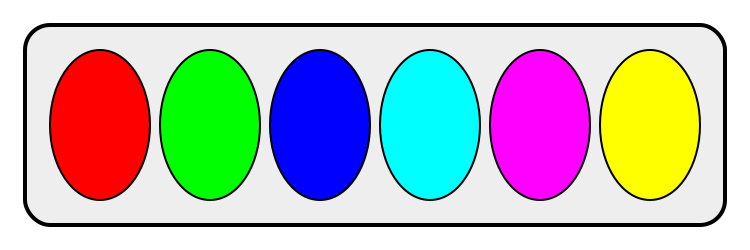

In [66]:
# création d'une chaîne de caractères multi-lignes contenant du code SVG
code = """
<svg viewBox='0 0 750 250' xmlns='http://www.w3.org/2000/svg'>
  <g fill='#EEE' stroke='#000' stroke-width='2'>
    <rect x='25' y='25' width='700' height='200' rx='25' stroke-width='4'/>
    <ellipse cx='100' cy='125' rx='50' ry='75' fill='#F00'/>
    <ellipse cx='210' cy='125' rx='50' ry='75' fill='#0F0'/>
    <ellipse cx='320' cy='125' rx='50' ry='75' fill='#00F'/>
    <ellipse cx='430' cy='125' rx='50' ry='75' fill='#0FF'/>
    <ellipse cx='540' cy='125' rx='50' ry='75' fill='#F0F'/>
    <ellipse cx='650' cy='125' rx='50' ry='75' fill='#FF0'/>
  </g>
</svg>
"""
dp.SVG(code) # on affiche le tracé correspondant au code SVG via la fonction 'dp.SVG'

Le code précédent est appelé **code SVG statique**, c'est-à-dire que les commandes SVG sont écrites avec des paramètres fixes et sont insérées dans une chaîne de caractère Python. Ce mécanisme fonctionne, mais  n'offre pas une grande flexibilité. Dans cette feuille d'exercices, nous allons au contraire générer du **code SVG dynamique** à l'aide de fonctions Python qui vont construire des commandes SVG en fonction des paramètres passés par l'utilisateur. Le principe général consiste à générer chaque commande SVG sous forme de chaînes de caractères et à les stocker dans une liste qui sera fusionnée puis insérée entre les balises **`<svg>`** et **`</svg>`** :

In [74]:
# fonction d'encapsulation de code SVG (taille viewbox = 640x320, mais affichage à 480 pixels de largeur)
svg = lambda code: f"""
<svg viewBox='0 0 640 320' width='480' xmlns='http://www.w3.org/2000/svg'>{''.join(code)}\n</svg>\n"""

# fonction de tracé de rectangle avec remplissage de couleur uniforme
rect = lambda x, y, w, h, fill: f"""
  <rect x='{x:.2f}' y='{y:.2f}' width='{w:.2f}' height='{h:.2f}' fill='{fill}'/>"""

# fonction de tracé de disque avec bordure noire et remplissage de couleur uniforme
disk = lambda x, y, r, fill: f"""
  <circle cx='{x:.2f}' cy='{y:.2f}' r='{r:.2f}' fill='{fill}' stroke='#000'/>"""

# fonction de tracé d'ellipse avec bordure noire et remplissage de couleur uniforme
oval = lambda x, y, rx, ry, fill: f"""
  <ellipse cx='{x:.2f}' cy='{y:.2f}' rx='{rx:.2f}' ry='{ry:.2f}' fill='{fill}' stroke='#000'/>"""

code = [ # le code est défini par une liste d'appels de fonctions, chacune retournant du code SVG
  rect(0, 0, 640, 320, '#000'), rect(20, 20, 600, 280, '#FFF'),
  disk(120, 160, 60, '#F00'), oval(320, 160, 100, 120, '#0F0'), disk(520, 160, 60, '#00F')
]

print(svg(code)) # affichage du code SVG généré
#with open('test.svg','w') as file: print(svg(code), file=file) # sauvegarde du code dans un fichier SVG
#dp.SVG(svg(code)) # affichage du tracé au format SVG
#dp.display(dp.HTML(f"<center>{dp.SVG(svg(code)).data}</center>")) # idem avec centrage horizontal


<svg viewBox='0 0 640 320' width='480' xmlns='http://www.w3.org/2000/svg'>
  <rect x='0.00' y='0.00' width='640.00' height='320.00' fill='#000'/>
  <rect x='20.00' y='20.00' width='600.00' height='280.00' fill='#FFF'/>
  <circle cx='120.00' cy='160.00' r='60.00' fill='#F00' stroke='#000'/>
  <ellipse cx='320.00' cy='160.00' rx='100.00' ry='120.00' fill='#0F0' stroke='#000'/>
  <circle cx='520.00' cy='160.00' r='60.00' fill='#00F' stroke='#000'/>
</svg>



<h2 style="padding:16px; color:white; background:#07D">Exercice B1 - Utilisation des formes de base</h2>

Ecrire les instructions Python/SVG permettant de générer les 12 images de la figure ci-dessous. Chaque image individuelle devra utiliser la balise SVG suivante, pour obtenir un tracé initial de taille 240 sur 240 (mais évidemment, comme c'est un tracé, on pourra le redimensionner de manière arbitraire) :

**```<svg viewBox='0 0 240 240' width='240' xmlns='http://www.w3.org/2000/svg'>```**

Vous aurez besoin des balises SVG suivantes :

- **`<rect x=... y=... width=... height=... fill=... />`**
- **`<circle cx=... cy=... r=... fill=... />`**
- **`<ellipse cx=... cy=... rx=... ry=... fill=... />`**

![](IMG/shapes.png 'shapes.png')

In [75]:
W, H = 240, 240 # définition de la taille des images à générer
KW = '#000 #FFF'.split() # palette binaire (noir et blanc au format '#RGB')
RGBCMY = '#F00 #0F0 #00F #0FF #F0F #FF0'.split() # palette de 6 couleurs (RGBCMY)

# fonction d'encapsulation de code SVG (en définissant une taille d'image variable = width x height)
svg = lambda code, width=W, height=H: f"""
<svg viewBox='0 0 {width} {height}' width='{width}' xmlns='http://www.w3.org/2000/svg'>{''.join(code)}
</svg>\n"""

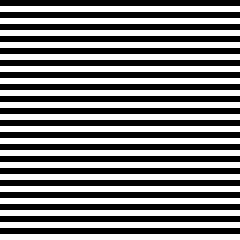

In [76]:
def stripes(rows, width, height, fills):
  """generate horizontal stripes with alternating filling colors"""
  h, n = height/rows, len(fills)
  return [rect(0, r*h, width, h, fills[r%n]) for r in range(rows)]

code = stripes(40, W, H, KW) # 40 lignes horizontales, alternance noir et blanc
#code = stripes(40, W, H, RGBCMY) # 40 lignes horizontales, alternance RGBCMY

def tiles(cols, rows, width, height, fills):
  """generate rectangular tiles with alternating filling colors"""
  w, h, n = width/cols, height/rows, len(fills)
  return [rect(c*w, r*h, w, h, fills[(r+c)%n]) for r in range(rows) for c in range(cols)]

#code = tiles(8, 8, W, H, KW)
#code = tiles(8, 8, W, H, RGBCMY)

def boxes(steps, width, height, fills):
  """generate concentric boxes with alternating filling colors"""
  w, h, n = width/(2*steps-1), height/(2*steps-1), len(fills)
  return [rect(s*w, s*h, width-2*s*w, height-2*s*h, fills[s%n]) for s in range(steps)]

#code = boxes(8, W, H, KW)
#code = boxes(8, W, H, RGBCMY)
#code = boxes(25, W, H, RGBCMY)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

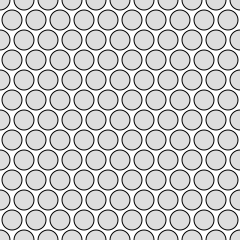

In [77]:
def quincunx(cols, rows, width, height, fills, pad=2):
  """generate a quincunx pattern of disks with alternating filling colors"""
  w, h, n = width/cols, height/rows, len(fills)
  radius = 0.5*w - pad # on réduit le rayon du disque par la marge souhaitée
  # on construit les lignes paires, puis les lignes impaires avec décalage (0.5*w, 0.5*h)
  code  = [disk(w*c, h*r, radius, fills[c%n]) for c in range(1+cols) for r in range(1+rows)]
  code += [disk(w*(0.5+c), h*(0.5+r), radius, fills[(c-1)%n]) for c in range(cols) for r in range(rows)]
  return code

code = quincunx(10, 6, W, H, ['#DDD'])
#code = quincunx(10, 6, W, H, RGBCMY[:3])
#code = quincunx(20, 12, W, H, RGBCMY[-3:], 0)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

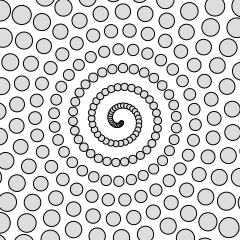

In [78]:
# Comme le code utilise beaucoup plus de paramètres que les exemples précédents, l'utilisation des listes
# par compréhension n'est pas idéale, il est beaucoup plus efficace de passer par les outils 'numpy'

def spiral(steps, width, height, fills):
  """create a spiral pattern of disks with alternating filling colors"""
  T = np.linspace(1, 20*np.pi, steps) # échantillonnage uniforme de l'angle de la spirale (en radians)
  D = 3*T # la distance au centre varie linéairement le long de la spirale (= spirale d'Archimède)
  #D = T ** 1.25 # variante : variation exponentielle de la distance au centre (= spirale de Descartes)
  X, Y = 0.5*width + D*np.cos(T), 0.5*height + D*np.sin(T) # coord cartésiennnes des centres des disques
  R = np.linspace(2, 12, steps) # le rayon des disques varie linéairement le long de la spirale
  #R = np.linspace(16, 100, steps) ** 0.5 # variante : variation inversement quadratique des rayons
  F = np.arange(steps) % len(fills) # les couleurs des disques sont cycliques le long de la spirale
  return [disk(x, y, r, fills[int(f)]) for x, y, r, f in np.vstack((X, Y, R, F)).T] 

code = spiral(300, W, H, ['#DDD'])
#code = spiral(345, W, H, KW)
#code = spiral(400, W, H, RGBCMY)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

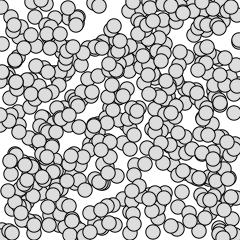

In [119]:
def splats(steps, minscale, maxscale, width, height, fills):
  """generate elliptical splats with random positions/sizes/fills"""
  XY = np.random.randint(0, (W, H), (steps, 2)) # positions aléatoires
  WH = minscale + (maxscale - minscale) * np.random.random((steps, 2)) # tailles aléatoires 
  WH *= (W, H) # ajustement des tailles des splats à la taille de l'image
  F = np.random.randint(0, len(fills), (steps, 1)) # indice de remplissages aléatoires
  return [oval(x, y, w, h, fills[int(f)]) for x,y,w,h,f in np.hstack((XY, WH, F))]

code = splats(500, 0.03, 0.03, W, H, ['#DDD'])
#code = splats(200, 0.03, 0.12, W, H, RGBCMY)

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

<h2 style="padding:16px; color:white; background:#07D">Exercice B2 - Dégradés, motifs et transformations</h2>

Ecrire les instructions Python permettant de générer les images de la figure ci-dessous. En plus des balises SVG et des fonctions Python de l'exercice précédent, vous aurez également besoin des balises suivantes :

- **`<linearGradient id=... x1=... y1=... x2=... y2=...> ... </linearGradient>`**
- **`<radialGradient id=... cx=... cy=... r=...> ... </radialGradient>`**
- **`<stop offset=... stop-color=... />`**
- **`<pattern id=... width=... height=..> ... </pattern>`**

![](IMG/gradients.png 'gradients.png')

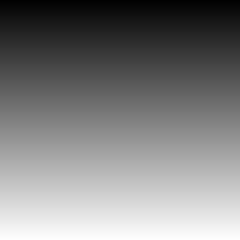

In [80]:
def lingrad(id, colors=('#000','#FFF'), box=(0,0,0,1)):
  """define a uniform linear color gradient on provided box"""
  n = len(colors); x1, y1, x2, y2 = box
  code = [f"\n<linearGradient id='{id}' x1='{x1}' y1='{y1}' x2='{x2}' y2='{y2}'>"]
  code += [f"  <stop offset='{p/(n-1)}' stop-color='{c}'/>" for p,c in enumerate(colors)]
  code += ['</linearGradient>']; return '\n'.join(code)

code  = [lingrad('KW')] # gradient linéaire par défaut (= vertical avec noir au nord, blanc au sud)
code += [rect(0, 0, W, H, 'url(#KW)')] # application du gradient sur un rectangle (= image complète)

#code#  = [lingrad('KW-D', box=(0,0,1,1))] # gradient diagonal
#code += [rect(0, 0, W, H, 'url(#KW-D)')] # application du gradient sur un rectangle (= image complète)

#code  = [lingrad('KW-H', box=(0.25,0,0.75,0))] # gradient horizontal avec aplats à gauche et à droite
#code += [rect(0, 0, W, H, 'url(#KW-H)')] # application du gradient sur un rectangle (= image complète)

#code  = [lingrad('BKG', '#07F #333 #0C0'.split(), (0,0,0,1))] # gradient vertical à 3 couleurs
#code += [lingrad('GKB', '#0C0 #333 #07F'.split(), (0,0,0,1))] # idem mais couleurs inversées
#code += [rect(0, 0, W, H, 'url(#BKG)')] # application du 1er gradient sur l'image complète
#code += [disk(0.5*W, 0.5*H, 0.33*W, 'url(#GKB)')] # application du 2nd gradient sur un disque

#code = [lingrad('KO', ('#000','#F90'))] # gradient vertical (noir vers orange)
#code += stripes(4, W, H, ['url(#KO)']) # réutilisation de la fonction 'stripes'

#code  = [lingrad('G-H', '#063 #0FA #063'.split(), (0,0,1,0))] # gradient multiple horizontal
#code += [lingrad('B-V', '#036 #0AF #036'.split(), (0,0,0,1))] # gradient multiple vertical
#code += tiles(6, 6, W, H, ['url(#G-H)','url(#B-V)']) # réutilisation de la fonction 'tiles'

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

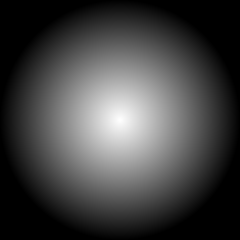

In [81]:
def radgrad(id, colors=('#FFF','#000'), disk=(0.5,0.5,0.5)):
  """define a uniform radial color gradient on provided disk"""
  n = len(colors); cx, cy, r = disk
  code = [f"\n<radialGradient id='{id}' cx='{cx}' cy='{cy}' r='{r}'>"]
  code += [f"  <stop offset='{p/(n-1)}' stop-color='{c}'/>" for p,c in enumerate(colors)]
  code += ['</radialGradient>']; return '\n'.join(code)

code  = [radgrad('WK')] # gradient radial par défaut (= centre blanc, bordure noire)
code += [rect(0, 0, W, H, 'url(#WK)')] # application du gradient sur un rectangle (= image complète)

#code  = [radgrad('KYK', ('#000','#000','#FE0','#FE0','#FE0','#000'))] # gradient radial à 6 zones
#code += [rect(0, 0, W, H, '#000')] # application d'un fond noir pour l'image complète
#code += [disk(0.5*W, 0.5*H, 0.5*W, 'url(#KYK)')] # application du gradient sur un disque

#code  = [radgrad('WR', ('#FCC','#F00')), radgrad('WG', ('#CFC','#0F0')), radgrad('WB', ('#CCF','#00F'))]
#code += quincunx(5, 3, W, H, ['url(#WR)','url(#WG)','url(#WB)'])
#code += spiral(240, W, H, ['url(#WR)', 'url(#WG)', 'url(#WB)'])

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG


<svg viewBox='0 0 240 240' width='240' xmlns='http://www.w3.org/2000/svg'>
  <pattern id='boxes' width='0.25' height='0.25'>
  <rect x='0.00' y='0.00' width='56.47' height='56.47' fill='#000'/>
  <rect x='4.34' y='4.34' width='47.78' height='47.78' fill='#FFF'/>
  <rect x='8.69' y='8.69' width='39.10' height='39.10' fill='#000'/>
  <rect x='13.03' y='13.03' width='30.41' height='30.41' fill='#FFF'/>
  <rect x='17.38' y='17.38' width='21.72' height='21.72' fill='#000'/>
  <rect x='21.72' y='21.72' width='13.03' height='13.03' fill='#FFF'/>
  <rect x='26.06' y='26.06' width='4.34' height='4.34' fill='#000'/>
  </pattern>
  <rect x='0.00' y='0.00' width='240.00' height='240.00' fill='url(#boxes)'/>
</svg>



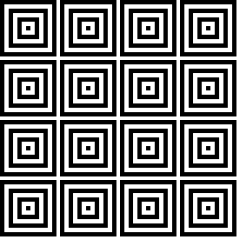

In [214]:
# fonction de création d'un motif répété 'nx' fois en horizontal, 'ny' fois en vertical
pattern = lambda id, code, nx=1, ny=1: f"""
  <pattern id='{id}' width='{1/nx}' height='{1/ny}'>{''.join(code)}
  </pattern>"""

pcode = boxes(7, W/4.25, H/4.25, KW) # création du code associé au motif avec la fonction 'boxes'
#pcode = boxes(11, W/3.8, H/3.8, RGBCMY[2:4]) # même motif avec d'autres paramètres
#pcode = spiral(250, W/3.7, H/3.5, RGBCMY[:3]) # autre motif avec la fonction 'spiral'
code = [pattern('boxes', pcode, 4, 4)] # répétition du motif 4x en X et 4x en Y
code += [rect(0, 0, W, H, 'url(#boxes)')] # application du motif sur un rectangle

pcode = [rect(0, 0, 32, 32, '#00F'), disk(16, 16, 15, '#FF0')] # création d'un motif avec 'disk'
#pcode = [disk(16, 16, 15, '#FF0'), disk(16, 16, 6, '#00F')] # autre motif avec double 'disk'
#pcode = quincunx(2, 1, 32, 32, ['#FF0']) # autre motif avec la fonction 'quincunx'
#code  = [pattern('dots', pcode, 6, 6), lingrad('grad', '#00F #005 #005 #00F'.split())]
#code += [rect(0, 0, W, H, 'url(#grad)'), disk(0.5*W, 0.5*H, 0.4*W, 'url(#dots)')]

print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

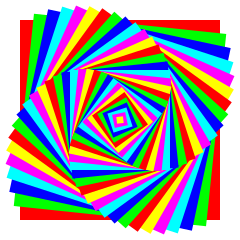

In [12]:
# fonction de transformation affine pour une liste de commandes SVG
transfo = lambda code, cx=0, cy=0, s=1, r=0, tx=0, ty=0: f"""
  <g transform='translate({cx+tx},{cy+ty}) rotate({r}) scale({s}) translate({-cx},{-cy})'>{''.join(code)}
  </g>"""

code = [transfo([rect(20, 20, W-40, H-40, RGBCMY[n%6])], W/2, H/2, 1-n/30, 6*n) for n in range(30)]

n = 500 # nombre de splats
XY = np.random.randint(0, (W, H), (n, 2)) # positions aléatoires
WH = 0.1 + 0.9*np.random.random((n, 2)) # tailles aléatoires
A = 90 * np.random.random((n, 1)) # orientations aléatoires
RGB = np.random.randint(0, 256, (n, 3)) # couleurs aléatoires
#code = [transfo([oval(0, 0, w*W/12, h*H/12, f"rgb{tuple(rgb)}")], 0, 0, 1, a, x, y)
#  for x,y,w,h,a,*rgb in np.hstack((XY, WH, A, RGB))] # création des splats

#print(svg(code)) # enlever le commentaire pour voir le code SVG généré
dp.SVG(svg(code)) # affichage du tracé au format SVG

<h2 style="padding:16px; color:white; background:#07D">Exercice B3 - Pixel Art</h2>

L'utilisation combinée des images et des tracés permet de bénéficier des avantages respectifs des deux modèles, et d'obtenir des résultats qu'il serait très difficile de produire en se limitant à un modèle unique. A titre d'illustration, on cherche à écrire une fonction qui transforme une image quelconque en un tracé dans lequel chaque pixel est remplacé par un disque coloré. Pour augmenter la variété des effets visuels, on rajoute une perturbation aléatoire (distribution normale) pour la position des disques, ainsi que pour leur taille, comme illustré sur la figure ci-dessous :

<center><a href="https://www.labri.fr/perso/schlick/inum/JUPYTER/IMG/tiger.svg">
<img src="IMG/tiger.svg"></a></center>

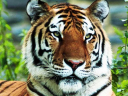

In [13]:
import PIL.Image as pim # import du module 'Image' du package 'Pillow'
from SRC.tools import view

tiger = pim.open('IMG/tiger.jpg') # lecture du fichier 'tiger.jpg'
tiger = np.array(tiger.resize((tiger.width//5, tiger.height//5), pim.BOX), dtype='u1') # réduction de taille
view(tiger) # affichage de l'image en taille réduite

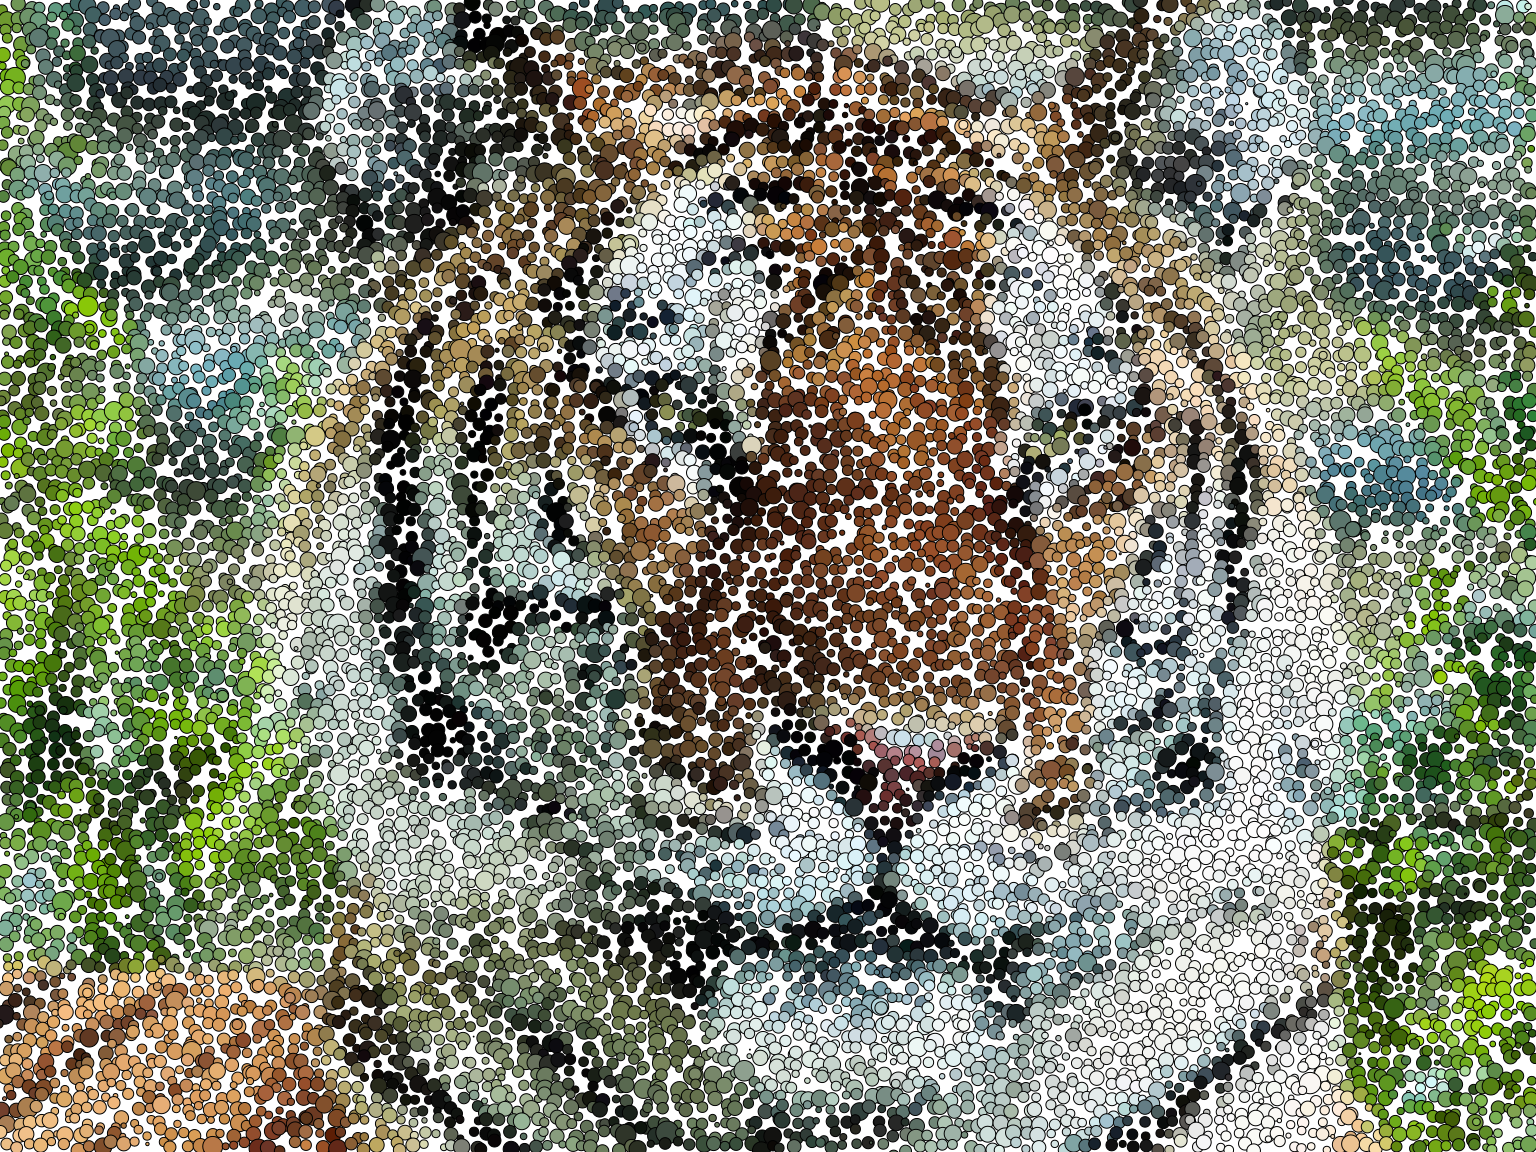

In [14]:
def pixart(pixels, r=6):
  """convert a grid of pixels as an SVG image based on circular dots of provided radius"""
  H, W, D = pixels.shape; R = np.random.normal(r, 0.25*r, (H, W)) # generate random dot sizes
  Y, X = np.indices((H,W))*2*r + np.random.normal(r, 0.5*r, (2,H,W)) # generate random dot positions
  coords = np.hstack((X.reshape((-1,1)), Y.reshape((-1,1)), R.reshape((-1,1))))
  pixels = pixels.reshape((-1,D)).tolist()
  view = f"viewBox='0 0 {2*r*W} {2*r*H}' xmlns='http://www.w3.org/2000/svg'" # define viewbox for SVG
  code = [disk(*xyr, f"rgb{tuple(rgb)}") for xyr,rgb in zip(coords,pixels)] # draw pixels as colored dots
  return f"<svg {view}>{'\n'.join(code)}</svg>" # return SVG code

#print(pixart(tiger)[:500]) # affichage des 500 premiers caractères du code généré
dp.SVG(pixart(tiger)) # affichage du tracé au format SVG

<h2 style="padding:0 0 8px; margin:0 -20px; color:#FFF; background:#07D; text-align:right">● ● ●</h3>